# Riya Raut

## Roll No.- DS24MS23

# Yes Bank Stock Closing Price Prediction

### Problem Statement

The aim of this project is to develop a predictive model that can accurately forecast the closing stock price of Yes Bank based on historical stock data. The dataset includes key stock price indicators—such as opening, highest, lowest, and closing prices— since the bank's inception.

### Importing Packages

In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### Load Dataset

In [9]:
df = pd.read_csv("https://raw.githubusercontent.com/rahulinchal/SPPU/refs/heads/main/Data/data_YesBank_StockPrices.csv")

### Data Variables

1. date- Date of the record.
2. open- Opening price 
3. high- Highest price 
4. low- Lowest price 
5. close- Closing price 

In [12]:
# head displays the first 5 rows to give a preview of the data
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [13]:
# shape shows how many rows and columns it contains.
df.shape

(185, 5)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


### Changing the datatype of Date column to datetime and extracting the Year, Month and Day

In [16]:
df['Date'] = pd.to_datetime(df['Date'], format = '%b-%y')

In [17]:
import datetime as dt

In [18]:
df["year"] = df["Date"].dt.year
df["month"] = df["Date"].dt.month
df["day"] = df["Date"].dt.day

In [19]:
# creating new columns of day, month and year
df["year"] = df["Date"].dt.year
df["month"] = df["Date"].dt.month
df["day"] = df["Date"].dt.day_name()

In [20]:
df['day_of_week'] = df['Date'].dt.dayofweek

In [21]:
df.head()

,Date,Open,High,Low,Close,year,month,day,day_of_week
0,2005-07-01,13.00,14.00,11.25,12.46,2005,7,Friday,4
1,2005-08-01,12.58,14.88,12.55,13.42,2005,8,Monday,0
2,2005-09-01,13.48,14.87,12.27,13.30,2005,9,Thursday,3
3,2005-10-01,13.20,14.47,12.40,12.99,2005,10,Saturday,5
4,2005-11-01,13.35,13.88,12.88,13.41,2005,11,Tuesday,1


### Data Preprocessing

In [23]:
#  Checking for duplicates
df.duplicated().sum()

0

In [24]:
# checking for null values
df.isnull().sum()

Date           0
Open           0
High           0
Low            0
Close          0
year           0
month          0
day            0
day_of_week    0
dtype: int64

In [25]:
# checking the data types of the variables in dataset using dtypes.
df.dtypes

Date           datetime64[ns]
Open                  float64
High                  float64
Low                   float64
Close                 float64
year                    int32
month                   int32
day                    object
day_of_week             int32
dtype: object

In [26]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,185,2013-03-01 19:04:12.972973056,2005-07-01 00:00:00,2009-05-01 00:00:00,2013-03-01 00:00:00,2017-01-01 00:00:00,2020-11-01 00:00:00,NaN
Open,185.0,105.541405,10.0,33.8,62.98,153.0,369.95,98.87985
High,185.0,116.104324,11.24,36.14,72.55,169.19,404.0,106.333497
Low,185.0,94.947838,5.55,28.51,58.0,138.35,345.5,91.219415
Close,185.0,105.204703,9.98,33.45,62.54,153.3,367.9,98.583153
year,185.0,2012.702703,2005.0,2009.0,2013.0,2017.0,2020.0,4.471315
month,185.0,6.567568,1.0,4.0,7.0,10.0,12.0,3.446332
day_of_week,185.0,3.054054,0.0,1.0,3.0,5.0,6.0,2.001982


In [27]:
# dropping the column
df = df.drop(columns=['Date'])
df = df.drop(columns=['day'])

In [28]:
df.head()

,Open,High,Low,Close,year,month,day_of_week
0,13.00,14.00,11.25,12.46,2005,7,4
1,12.58,14.88,12.55,13.42,2005,8,0
2,13.48,14.87,12.27,13.30,2005,9,3
3,13.20,14.47,12.40,12.99,2005,10,5
4,13.35,13.88,12.88,13.41,2005,11,1


observation : 1. There are no duplicate values and null values in the dataset.
              2. dtypes shows useful columns datatype is in numerical type.

### Exploratory Data Analysis (EDA)

### Univariate analysis

#### Histogram for closing price

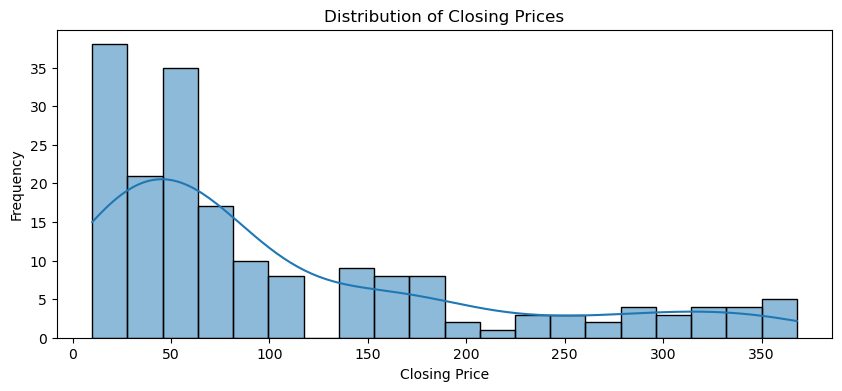

In [33]:
plt.figure(figsize=(10,4))
sns.histplot(df['Close'],kde=True,bins=20)
plt.title("Distribution of Closing Prices")
plt.xlabel("Closing Price")
plt.ylabel("Frequency")
plt.show()

### Observation

The distribution is right-skewed, meaning that most of the closing prices are on the lower end, while fewer data points have very high closing prices.

### Bar Plot for monthly distibution of average closing price

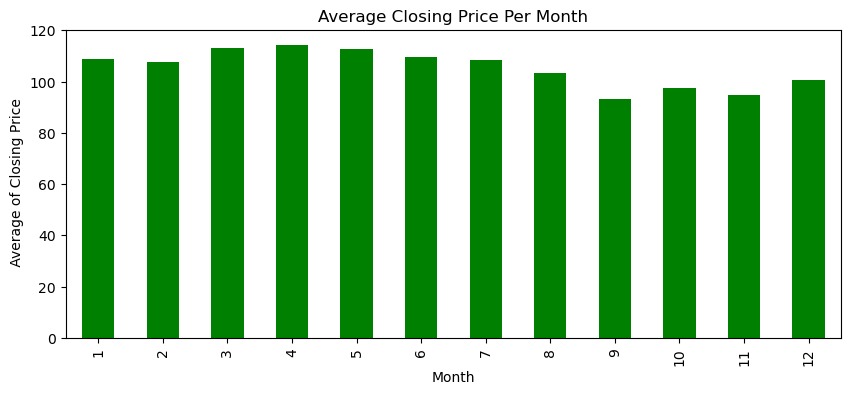

In [37]:
monthly_avg=df.groupby('month')['Close'].mean()
monthly_avg.plot(kind='bar',figsize=(10,4), color = 'green')
plt.title("Average Closing Price Per Month")
plt.ylabel(" Average of Closing Price")
plt.xlabel("Month")
plt.show()

### Observation

Month April have highest closing price while September shows lowest closing price.<br>Yes bank seems to perform well at start of the year (Primarily April).

#### Pie Chart 

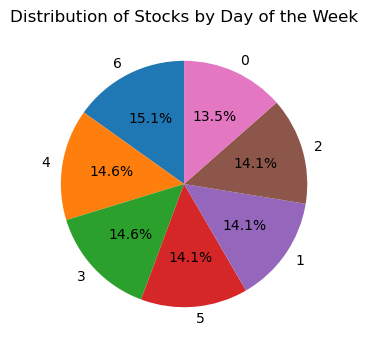

In [41]:
plt.figure(figsize = (10,4))
df['day_of_week'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Stocks by Day of the Week')
plt.ylabel('')
plt.show()

### Observation

Almost balance distribution of the stock prices across all days of week.

### Bivariate Analysis

#### Scatter plot for Opening vs Closing price

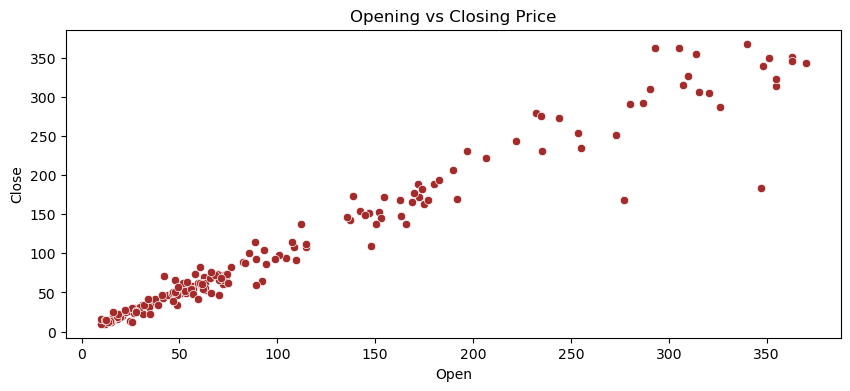

In [46]:
plt.figure(figsize = (10,4))
sns.scatterplot(x='Open', y='Close', data=df, color ='brown')
plt.title('Opening vs Closing Price')
plt.show()

### Observation

Opening and closing price shows positive correlation

#### Scatter plot for Highest vs Lowest price

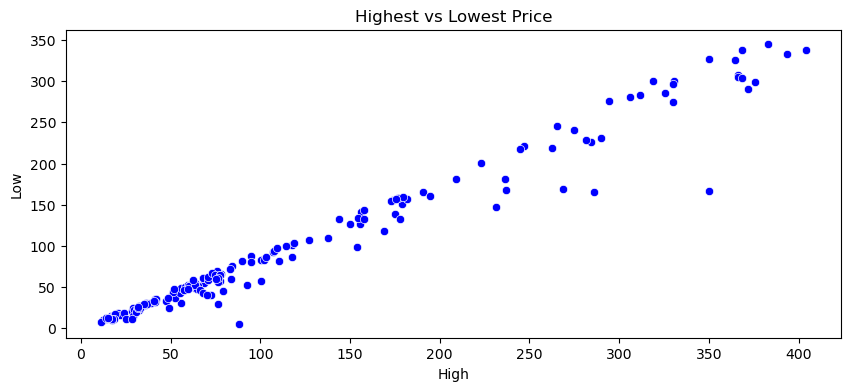

In [50]:
plt.figure(figsize = (10,4))
sns.scatterplot(x='High', y='Low', data=df, color ='blue')
plt.title('Highest vs Lowest Price')
plt.show()

### Observations

The scatter plot shows a strong positive correlation between high and low prices.

### Multivariate Analysis

#### Line Graph

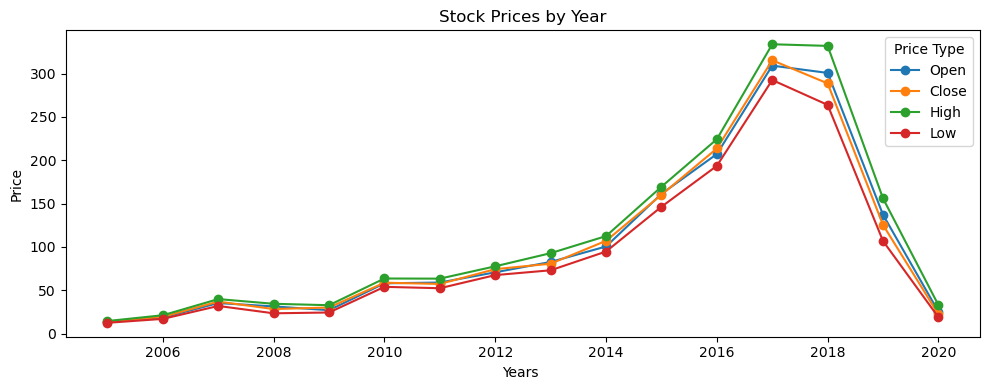

In [55]:
grouped = df.groupby('year')[['Open', 'Close', 'High', 'Low']].mean()
grouped.plot(kind='line',figsize=(10,4), marker='o')
plt.title('Stock Prices by Year')
plt.xlabel('Years ')
plt.ylabel('Price')
plt.legend(title='Price Type')
plt.tight_layout()
plt.show()

### Observation

The Opening, Closing, Lowest and Highest stock prices of Yes Bank moved closely together.<br> It goes consistently upward trend until approx. 2017 then followed by a sharp decline.<br> Showing stock prices peaked in year range 2016 to 2018.

### Correletion analysis

In [59]:
float_dtype =  df.select_dtypes(include = 'float')
float_dtype.head()

,Open,High,Low,Close
0,13.00,14.00,11.25,12.46
1,12.58,14.88,12.55,13.42
2,13.48,14.87,12.27,13.30
3,13.20,14.47,12.40,12.99
4,13.35,13.88,12.88,13.41


<Axes: >

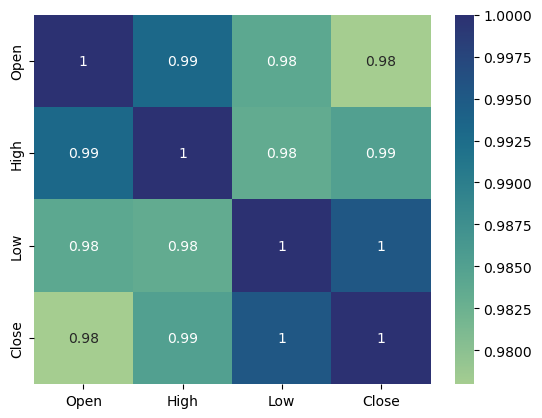

In [60]:
# heatmap

sns.heatmap(float_dtype.corr(),annot = True, cmap = "crest")

### Observation

The heatmap shows a positive correlation between all the variables in the dataset.<br> variables 'Close' and 'Low' prices have a perfect correlation of 1.00.

### Outlier Detections

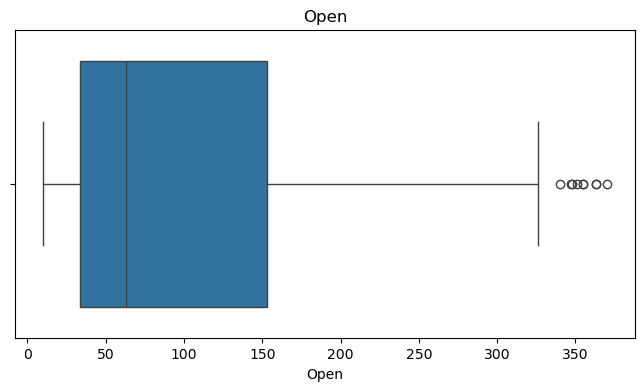

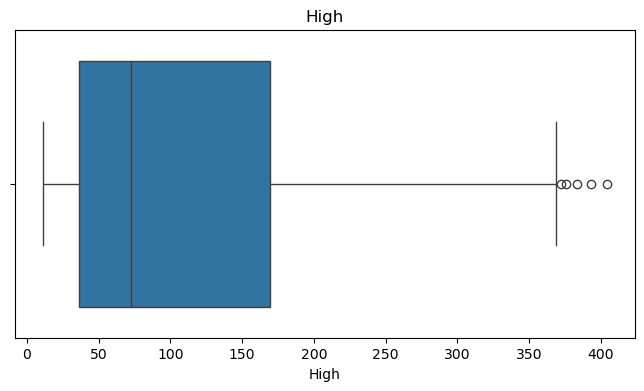

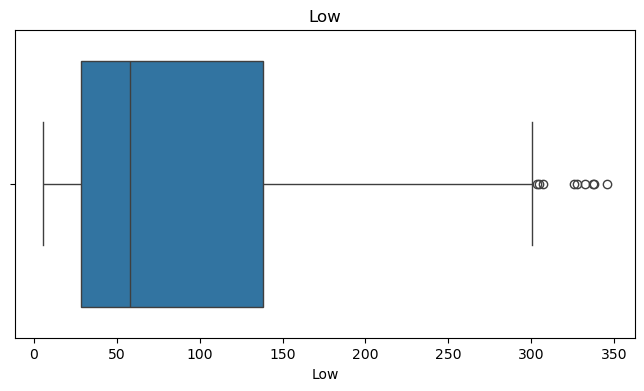

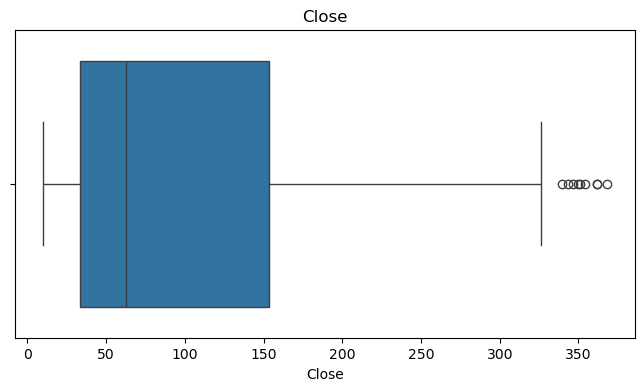

In [64]:
# Boxplot
for i in float_dtype.columns:
    plt.figure(figsize = (8,4))
    sns.boxplot(x=df[i])
    plt.title(i)
    plt.show()

### Model Preparation

In [66]:
x = df.drop(['Close'], axis = 1).values
y = df['Close'].values

Train Test Split

In [68]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

### Scaling

In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [71]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Importing Linear Regression

In [73]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [74]:
y_pred = lr.predict(x_test)
y_pred

array([ 16.47375718,  31.98296097, 118.19474968, 145.39094894,
        51.6135333 , 199.71669506,  39.85983967,  72.92117234,
        54.57882246,  58.06880714,  91.71320495, 138.66067324,
        37.76452323, 135.68613511, 229.88446184,  69.34725131,
       167.69999792,  19.41864178,  14.33142526,  69.23186246,
       338.13046709,  62.87664466,  32.59099507,  74.32695352,
        68.33122932, 249.55087674,  50.09224119, 227.9441542 ,
        29.10553243,  73.46800225, 217.35281008, 264.84066929,
       374.10816102,  34.43621729, 230.83065755,  57.43935687,
        49.69051904,  13.67851869, 143.21585679,  20.80227636,
        13.26544476,  12.90070789,  67.70116225,  91.63269834,
        23.08600703, 182.28087327,  97.13740225,  70.26242055,
       106.36224636, 242.87621644, 167.7869209 , 312.50898563,
        55.94468515,  62.33246282,  73.89882358,  15.44122471])

In [75]:
y_train

array([ 13.3 , 343.4 , 181.75,  64.76,  53.41,  14.37, 286.38,  27.95,
       169.65,  25.12,  62.13,  33.75,  22.45,  61.21,  50.97, 206.39,
       147.95, 314.35,  62.38,  15.03,  70.45, 172.55,  82.7 ,  54.49,
        92.84,  15.45,  68.3 ,  24.13, 362.05, 279.1 , 167.96,  14.67,
        28.63,  26.97, 290.56, 153.3 , 326.14,  12.26, 114.33, 172.91,
        65.99, 350.  ,  26.83, 351.15,  46.18, 137.67,  73.46,  50.57,
        16.12, 151.82, 354.45, 304.9 , 272.56,  47.31,  92.2 , 104.41,
        25.32,  74.02, 113.89,  25.45,  13.58,  52.59,  46.95,  40.99,
        48.65,  61.59,  26.85,  20.08,  33.45, 165.74,   9.98, 183.45,
        16.16,  35.98,  15.33, 361.96,  37.93,  66.02,  15.62,  57.5 ,
       346.2 ,  36.99,  49.81,  18.46,  94.5 , 108.7 , 309.82,  22.85,
        82.29,  12.99,  91.3 ,  62.9 ,  13.41, 315.05,  55.61,  47.72,
       168.6 ,  31.13,  58.99,  51.29,  49.84,  73.74,  13.71,  39.2 ,
       253.52, 322.25,  25.6 ,  28.14,  57.1 , 188.73,  59.5 , 292.37,
      

In [76]:
x_train

array([[-0.90540386, -0.93036724, -0.87279919, -1.67580476,  0.63151432,
        -0.04739789],
       [ 2.60221478,  2.64627205,  2.58691945,  1.17442301,  0.34667045,
        -0.5569252 ],
       [ 0.67409215,  0.71884096,  0.69842906,  1.17442301,  1.48604593,
         0.97165674],
       [-0.12884128, -0.14422904, -0.39016138,  0.07818156,  0.06182658,
        -1.57597983],
       [-0.53640872, -0.55535919, -0.48692261, -0.7988116 ,  1.48604593,
        -1.06645252],
       [-0.91996687, -0.909319  , -0.87726019,  1.61291959,  0.34667045,
         0.97165674],
       [ 2.16975247,  1.9688678 ,  1.91936252,  0.95517472, -0.50786117,
        -1.57597983],
       [-0.8186162 , -0.78716564, -0.7875091 ,  1.61291959, -0.79270504,
        -0.5569252 ],
       [ 0.85120982,  1.05984093,  0.55822617,  1.17442301,  1.20120206,
        -0.04739789],
       [-0.88119778, -0.80196375, -0.84635183, -0.7988116 , -0.50786117,
         0.46212943],
       [-0.41813347, -0.44202955, -0.35139316, -0.

### Checking accuracy

In [78]:
print("Trainig Score: ",(lr.score(x_train, y_train))*100,"%")
print("Testing Score: ",(lr.score(x_test, y_test))*100,"%")

Trainig Score:  99.62935679052694 %
Testing Score:  99.15156738045027 %


###  Scatter Plot

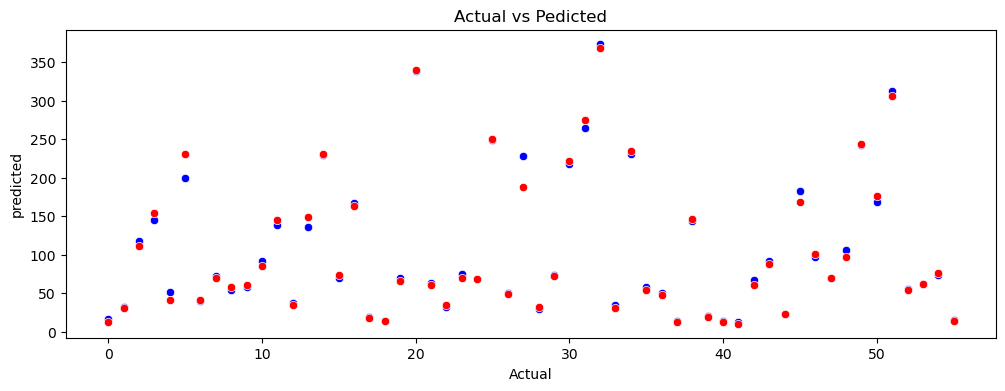

In [80]:
plt.figure(figsize=(12,4))
sns.scatterplot(y_pred, color='b')
sns.scatterplot(y_test,color='r')
plt.title('Actual vs Pedicted')
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.show()

In [81]:
predicted_value = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred.astype(int), 'Difference': y_test - y_pred})
predicted_value.sample(10)

,Actual Value,Predicted Value,Difference
24,67.83,68,-0.501229
48,97.49,106,-8.872246
52,54.50,55,-1.444685
10,85.71,91,-6.003205
44,22.78,23,-0.306007
6,41.36,39,1.500160
22,34.06,32,1.469005
26,49.42,50,-0.672241
51,306.80,312,-5.708986
55,13.42,15,-2.021225


### Evaluation Matrics

In [83]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

MAE = mean_absolute_error(y_test,y_pred)
print("MAE :",MAE)

MSE = mean_squared_error(y_test, y_pred)
print("MSE :",MSE)

RMSE = np.sqrt(MSE)
print("RMSE :", RMSE)

r2 = r2_score(y_test, y_pred)
print("R2 Linear regression :" ,r2*100)

MAE : 4.908809252867178
MSE : 70.14357677940382
RMSE : 8.375176223782029
R2 Linear regression : 99.15156738045027


### Random Forest Regressor

In [85]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor(n_estimators = 20, max_depth=8)
random_forest.fit(x_train,y_train)
rf_pred = random_forest.predict(x_test)

MSE = mean_squared_error(y_test, rf_pred)
print("MSE :", MSE)

RMSE = np.sqrt(MSE)
print("RMSE :", RMSE)

r2 = r2_score(y_test, rf_pred)
print("R2 for Random Forest :", r2*100)

MSE : 122.47801138356509
RMSE : 11.06697842157312
R2 for Random Forest : 98.51854802953373


In [86]:
print("Trainig Score: ",(random_forest.score(x_train, y_train))*100,"%")
print("Testing Score: ",(random_forest.score(x_test, y_test))*100,"%")

Trainig Score:  99.74622812085424 %
Testing Score:  98.51854802953373 %


In [87]:
predicted_value = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': rf_pred, 'Difference': y_test - rf_pred})
predicted_value.sample(10)

,Actual Value,Predicted Value,Difference
22,34.06,32.989367,1.070633
7,69.14,67.608292,1.531708
41,10.26,13.058961,-2.798961
11,145.23,142.624500,2.605500
10,85.71,89.035500,-3.325500
0,12.24,13.050913,-0.810913
28,31.93,27.321536,4.608464
17,18.03,18.801000,-0.771000
54,76.44,72.321742,4.118258
19,65.97,68.911750,-2.941750


### Decision Tree Regressor

In [89]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor(max_depth=14)

decision_tree.fit(x_train, y_train)
 
DT_pred = decision_tree.predict(x_test)
DT_train = decision_tree.predict(x_train)

MSE = mean_squared_error(y_test,DT_pred)
print("MSE:", MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" , RMSE)

r2 = r2_score(y_test, DT_pred)
print("R2 for Decision Tree Regressor : ", r2*100)

MSE: 122.00415357142856
RMSE : 11.045549038930956
R2 for Decision Tree Regressor :  98.52427965092096


In [90]:
print("Trainig Score: ",(decision_tree.score(x_train, y_train))*100,"%")
print("Testing Score: ",(decision_tree.score(x_test, y_test))*100,"%")

Trainig Score:  100.0 %
Testing Score:  98.52427965092096 %


In [91]:
predicted_value = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': DT_pred, 'Difference': y_test - DT_pred})
predicted_value.sample(10)

,Actual Value,Predicted Value,Difference
13,149.38,137.90,11.48
55,13.42,14.67,-1.25
34,234.28,253.52,-19.24
31,275.05,279.10,-4.05
28,31.93,26.83,5.10
3,154.57,147.95,6.62
47,70.30,62.54,7.76
42,61.02,62.13,-1.11
30,221.30,206.39,14.91
7,69.14,66.02,3.12


### Support Vector Machine

In [93]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

svm = SVR( C=100, gamma=0.1, epsilon=0.1)

svm.fit(x_train, y_train)

y_train_pred = svm.predict(x_train)
y_test_pred = svm.predict(x_test)

MSE_test = mean_squared_error(y_test, y_test_pred)

RMSE_test = np.sqrt(MSE_test)

r2_test = r2_score(y_test, y_test_pred)
print(" MSE:", MSE_test)
print(" RMSE:", RMSE_test)
print(" R2:", r2_test * 100)

 MSE: 131.0135090036122
 RMSE: 11.446113270609032
 R2: 98.4153055811523


In [94]:
print("Trainig Score: ",(svm.score(x_train, y_train))*100,"%")
print("Testing Score: ",(svm.score(x_test, y_test))*100,"%")

Trainig Score:  98.91302476113175 %
Testing Score:  98.4153055811523 %


In [95]:
predicted_value = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_test_pred, 'Difference': y_test - y_test_pred})
predicted_value.sample(10)

,Actual Value,Predicted Value,Difference
12,34.55,30.977056,3.572944
35,53.83,56.625845,-2.795845
2,111.70,113.836363,-2.136363
22,34.06,34.339945,-0.279945
8,57.57,53.221077,4.348923
30,221.30,225.110396,-3.810396
7,69.14,69.174565,-0.034565
37,12.46,12.817596,-0.357596
21,60.95,56.245440,4.704560
50,176.52,179.671088,-3.151088


### K Nearest Neighbor

In [97]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)  

knn.fit(x_train, y_train)
 
train_score = knn.score(x_train, y_train)  
test_score = knn.score(x_test, y_test)  


In [98]:
print("Training Score:", train_score * 100)  
print("Testing Score:", test_score * 100)    

Training Score: 97.18110451965826
Testing Score: 94.11133428678721


### Performing Cross Validation

In [100]:
from sklearn.model_selection import cross_val_score

In [101]:
print("Training:", ((cross_val_score(knn, x_train, y_train))*100).mean().astype(int), "%")
print("Testing:", ((cross_val_score(knn, x_test, y_test))*100).mean().astype(int), "%")

Training: 94 %
Testing: 88 %


### Printing all Scores using DataFrame

In [103]:
all_scores = pd.DataFrame({'Linear Regression': ((lr.score(x_train, y_train))*100, (lr.score(x_test, y_test))*100),
                           'Random Forest Regressor': ((random_forest.score(x_train, y_train))*100, (random_forest.score(x_test, y_test))*100),
                           'Decision Tress Regressor': ((decision_tree.score(x_train, y_train))*100, (decision_tree.score(x_test, y_test))*100),
                           'Support Vector Machine': ((svm.score(x_train, y_train))*100, (svm.score(x_test, y_test))*100),
                           'K Nearest Neighbor': ((knn.score(x_train, y_train))*100, (knn.score(x_test, y_test))*100),})
all_scores.T.rename(columns = {0:'Training Score', 1 : 'Test Score'})
     

,Training Score,Test Score
Linear Regression,99.629357,99.151567
Random Forest Regressor,99.746228,98.518548
Decision Tress Regressor,100.000000,98.524280
Support Vector Machine,98.913025,98.415306
K Nearest Neighbor,97.181105,94.111334


### Observation

**Linear Regression**: Model is excellent fit and generalization.<br>
**Random Forest Regressor** : Model shows generalizaton.<br>
**Decision Tree Regressor** : Model shows 100% train score, little overfit.<br>
**SVM** : Shows perfect accuracy.<br>
**KNN** : Shows good accuracy.<br>
**Cross Validation** : cross-validation working decent, needs hyperparameter tuning.